# usa housing price dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
USAHousing = pd.read_csv('USA_Housing.csv')
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# we have to drop address column as it is non significant variable

In [4]:
USAHousing = USAHousing.drop(['Address'], axis=1)

In [5]:
 USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [6]:
# information of the data
USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [7]:
# Pre Processing method
### Step 1 - handling missing data - There is no misssing data
### Step 2 - Encoding - there is no object/char variable, hence not required
### Step 3 - Handling Outlier

In [8]:
USAHousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [9]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [10]:
list1 = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']

<AxesSubplot:ylabel='Avg. Area Income'>

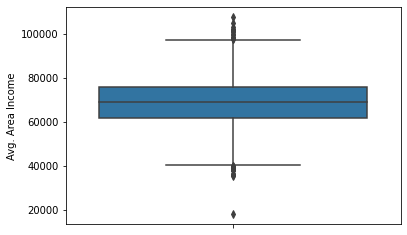

In [11]:
sns.boxplot(y='Avg. Area Income', data = USAHousing)

<AxesSubplot:ylabel='Avg. Area House Age'>

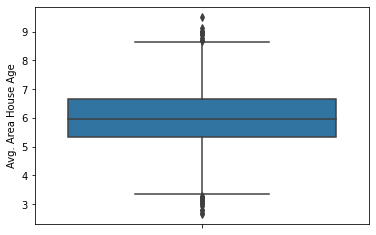

In [12]:
sns.boxplot(y='Avg. Area House Age', data = USAHousing)

<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

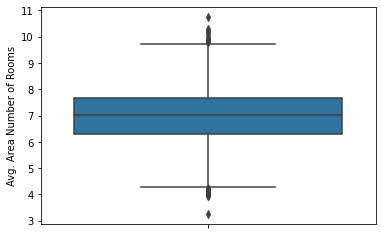

In [13]:
sns.boxplot(y='Avg. Area Number of Rooms', data = USAHousing)

<AxesSubplot:ylabel='Avg. Area Number of Bedrooms'>

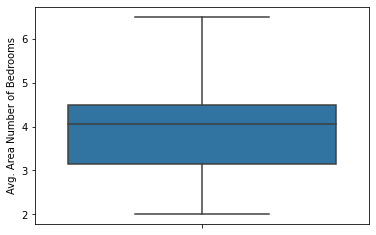

In [14]:
sns.boxplot(y='Avg. Area Number of Bedrooms', data = USAHousing)

<AxesSubplot:ylabel='Area Population'>

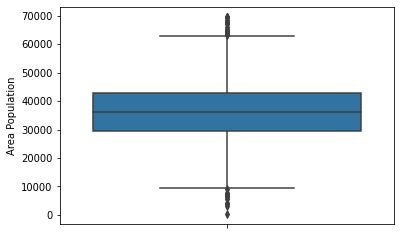

In [15]:
sns.boxplot(y='Area Population', data = USAHousing)

In [16]:
Q1 =USAHousing.quantile(0.25)
Q3 =USAHousing.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR
print(Q1)
print(Q3)
print(pos_outlier)
print(neg_outlier) 

Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64
Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
Avg. Area Income                9.723750e+04
Avg. Area House Age             8.643597e+00
Avg. Area Number of Rooms       9.715803e+00
Avg. Area Number of Bedrooms    6.515000e+00
Area Population                 6.304733e+04
Price                           2.181660e+06
dtype: float64
Avg. Area Income                 40026.397972
Avg. Area House Age                  3.329495
Avg. Area Number of Roo

In [17]:
USAHousing = USAHousing[~((USAHousing < (Q1 - 1.5 * IQR)) |
                         (USAHousing > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:ylabel='Avg. Area Income'>

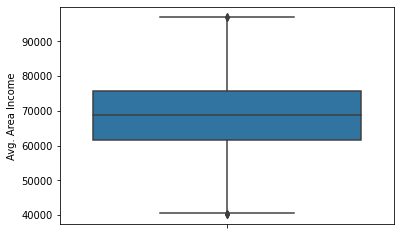

In [18]:
sns.boxplot(y='Avg. Area Income', data = USAHousing)

<AxesSubplot:ylabel='Avg. Area House Age'>

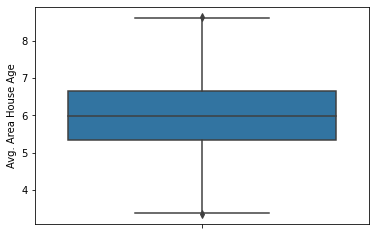

In [19]:
sns.boxplot(y='Avg. Area House Age', data = USAHousing)

<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

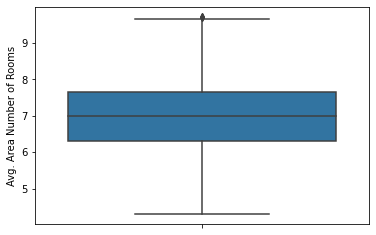

In [20]:
sns.boxplot(y='Avg. Area Number of Rooms', data = USAHousing)

<AxesSubplot:ylabel='Avg. Area Number of Bedrooms'>

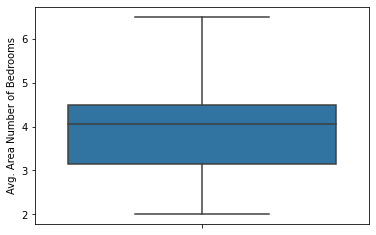

In [21]:
sns.boxplot(y='Avg. Area Number of Bedrooms', data = USAHousing)

<AxesSubplot:ylabel='Area Population'>

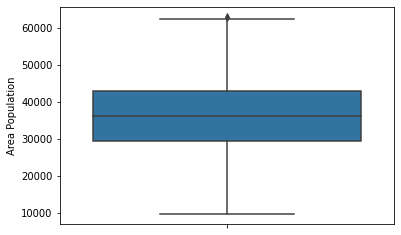

In [22]:
sns.boxplot(y='Area Population', data = USAHousing)

In [23]:
# split the data into independent and dependent variable

In [24]:
x = USAHousing.iloc[:,0:-1]
y = USAHousing['Price']

In [25]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [26]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4865, dtype: float64

In [27]:
# part 4 feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

# Exploratory Data Analysis

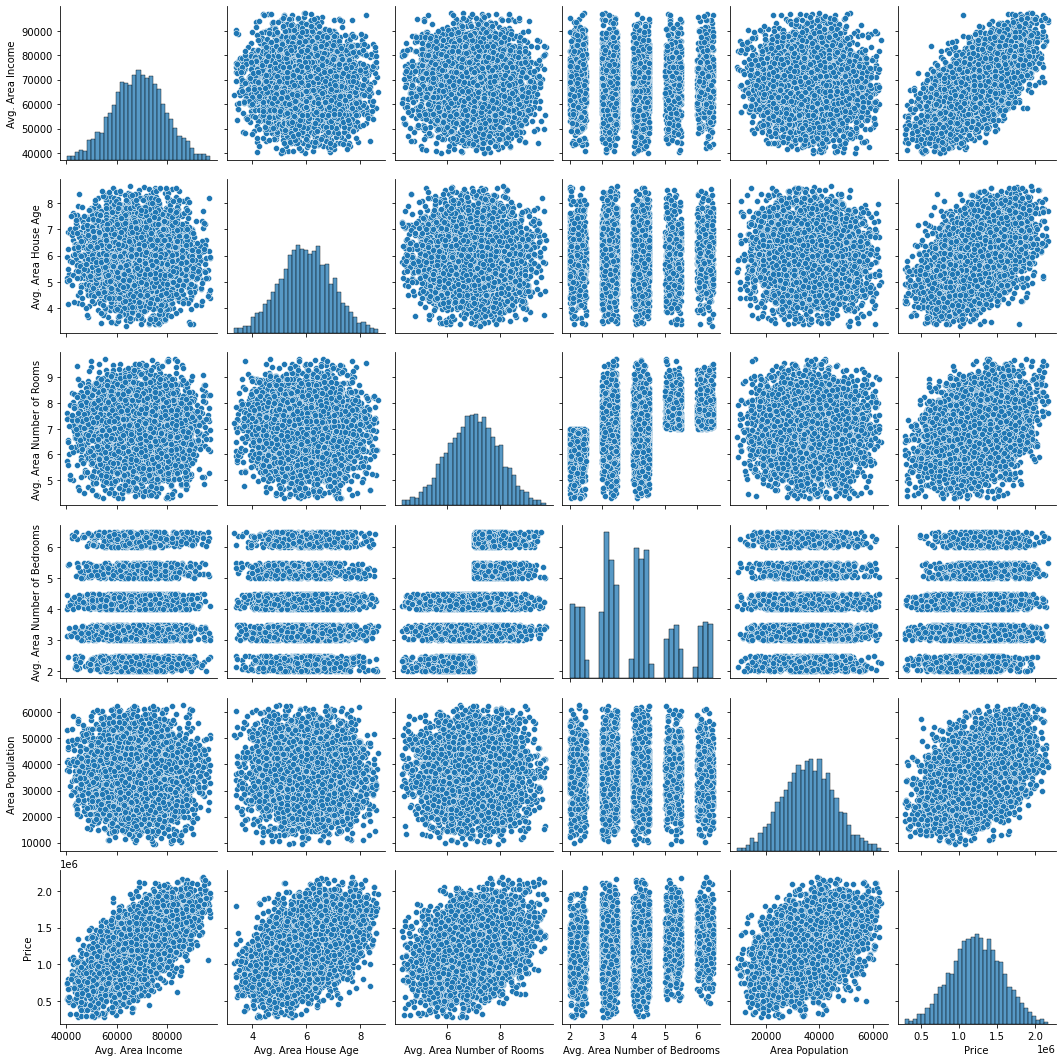

In [28]:
sns.pairplot(USAHousing)

<AxesSubplot:xlabel='Price', ylabel='Density'>

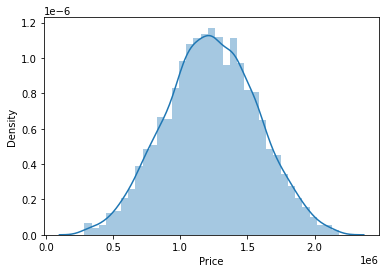

In [29]:
sns.distplot(USAHousing['Price'])

In [30]:
USAHousing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


<AxesSubplot:>

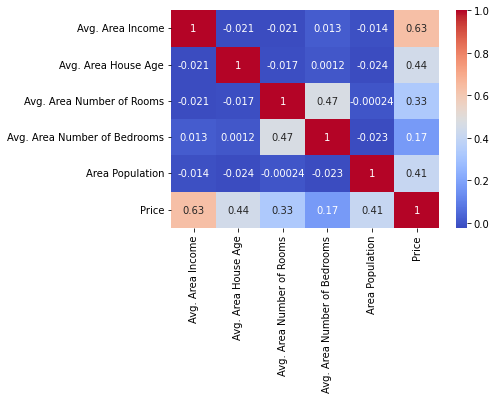

In [31]:
sns.heatmap(USAHousing.corr(), annot = True, cmap = 'coolwarm')

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaler
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variable, i) for
             i in range(variable.shape[1])]
vif['Features'] = x.columns

In [33]:
vif

,VIF,Features
0,1.001776,Avg. Area Income
1,1.001451,Avg. Area House Age
2,1.280194,Avg. Area Number of Rooms
3,1.280126,Avg. Area Number of Bedrooms
4,1.001448,Area Population


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, train_size
                                                   =0.75, random_state=551)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3648, 5)
(1217, 5)
(3648,)
(1217,)


In [35]:
# Model Building
# simple method
# ols
# rigde
# lasso
# prediction
# evaluation
# conclude

# Model Building

In [36]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [37]:
linear_model.intercept_

1230719.6480295872

In [38]:
linear_model.coef_

array([220082.87745074, 159780.49177818, 118463.63038475,   1640.83901976,
       144398.60721637])

In [39]:
y_pred = linear_model.predict(x_test)

In [40]:
y_pred

array([1352990.47739837, 1288064.59520575,  922148.1995754 , ...,
        934874.35475107, 1485936.10551998,  771839.2971845 ])

In [41]:
y_test

74      1.534480e+06
846     1.412274e+06
3529    8.435362e+05
3955    7.710021e+05
2306    7.501197e+05
            ...     
4584    1.519928e+06
577     1.006545e+06
531     9.112022e+05
1591    1.543913e+06
2747    6.951522e+05
Name: Price, Length: 1217, dtype: float64

In [42]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9111385636697983


# Regression method with "OLS" method

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size
                                                   =0.75, random_state=551)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3648, 5)
(1217, 5)
(3648,)
(1217,)


In [44]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as srlm

In [45]:
reg_model = srlm.OLS(endog=y_train, exog=x_train).fit()

In [46]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.119e+04
Date:                Mon, 26 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:09:28   Log-Likelihood:                         -50251.
No. Observations:                3648   AIC:                                  1.005e+05
Df Residuals:                    3643   BIC:                                  1.005e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                 9.5902      0.311     30.817      0.000       8.980      10.200
Avg. Area House Age           5.172e+04   3382.459     15.290      0.000    4.51e+04    5.83e+04
Avg. Area Number of Rooms    -6785.7276   3747.620     -1.811      0.070   -1.41e+04     561.914
Avg. Area Number of Bedrooms  6398.9639   3522.896      1.816      0.069    -508.080    1.33e+04
Area Population                  8.3399      0.380     21.927      0.000       7.594       9.086
==============================================================================
Omnibus:                        7.938   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.592
Skew:                          -0.001   Prob(JB):                       0.0370
Kurtosis:                       2.792   Cond. No.                     9.43e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

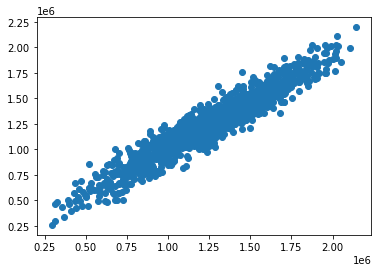

In [47]:
plt.scatter(y_test, y_pred)

In [48]:
# Final Conclusion
# linear regression
# 1) adj r-square = 96.7% (accuracy)
# 2) all independent variable are statically significant
# 3) assumption
    # a) data is linear line
    # b) there is no hetroscadicity
    # c) there is no multicollinearity
    # d) there is no autocorellation
    # e) selected right dep and ind variable, hence, no endoginity problem
    # f) data should be normaly distributed

In [49]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))

MAE : 81422.38617905127


In [50]:
print('MAPE :', metrics.mean_absolute_error(y_test, y_pred)*100)

MAPE : 8142238.617905128


In [51]:
print('MSE :', metrics.mean_squared_error(y_test, y_pred))

MSE : 10479148212.6629


In [52]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 102367.71079135696
